### Understanding vanishing and exploding gradient problem using different activation functions
- Difference in loss function behavior when we use RelU vs Sigmoid function
- Using gradient tape to analyze gardients 

In [106]:
import numpy as np
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut
import pandas as pd

In [107]:
trainX, trainy, testX, testy = ut.create_dataset()
n_input, n_classes = trainX.shape[1], testy.shape[1]

In [108]:
def evaluate_model(n_layers, trainX, trainy, testX, testy, activation):
    model = tf.keras.Sequential()
    model.add(layers.Dense(10, activation=activation, name='layer-0', input_shape=(n_input,)))
    for i in range(n_layers):
        model.add(layers.Dense(10, activation=activation, name='layer-'+str(i+1), input_shape=(n_input,)))            
    model.add(layers.Dense(n_classes, activation='softmax', name='layer-'+str(i+2)))
        
    model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainy, epochs=100, verbose=0)  
    loss_val, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc

### Explation of code:

**model.compile**:
- optimizer: the algorithm used to update weights during training. e.g., adam, sgd
- a loss function: to measure the error between the predicted value and the actual value
- metrics: list of metrics to be evaluated by model during testing and training
- #run_eagerly: to run the model eagerly

**model.fit**:
A history object. Its History.histoyr attribute is a record of training loss values and metrics values at succesive epochs, as well as validation loss values and validation metrics values (if applicable)

**model.evaluate**
returns scalar test loss

nodes=1: 0.192
nodes=2: 0.072
nodes=3: 0.038
nodes=4: 0.038
nodes=5: 0.038
nodes=10: 0.038


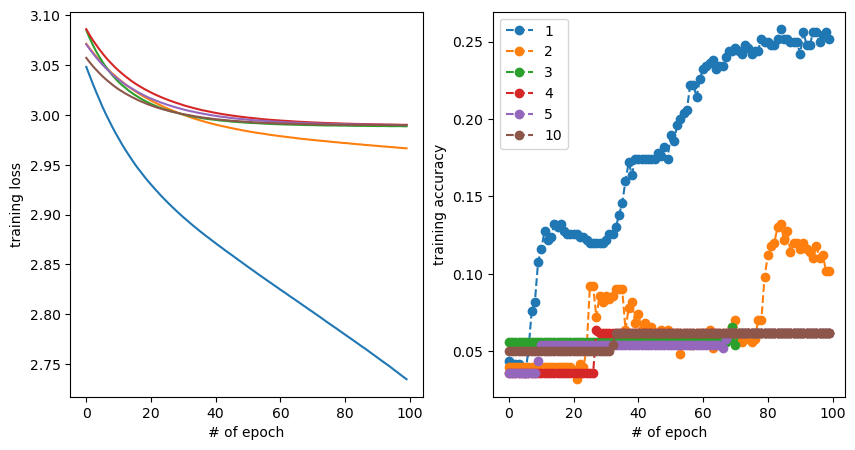

In [109]:
num_layers = [1,2,3,4,5,10]
plt.figure(figsize=(10,5))
activation = 'sigmoid'
for n_layers in num_layers:
  history, result = evaluate_model(n_layers, trainX, trainy, testX, testy, activation)
  # summarize final test set accuracy
  print('nodes=%d: %.3f' % (n_layers, result))

  # plot learning curve 
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label=str(n_layers))
  plt.xlabel('# of epoch')
  plt.ylabel('training loss')

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label=str(n_layers), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('training accuracy')

plt.legend()
plt.show()

nodes=1: 0.992
nodes=2: 0.986
nodes=3: 0.962
nodes=4: 0.996
nodes=5: 0.932
nodes=10: 0.232


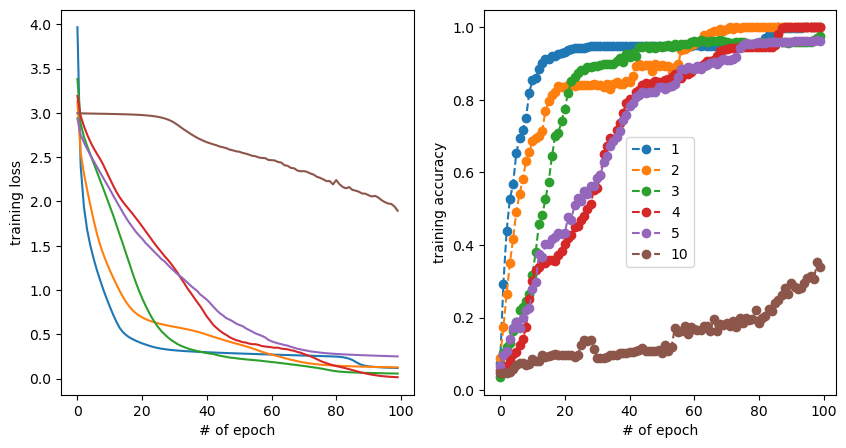

In [110]:
num_layers = [1,2,3,4,5,10]
plt.figure(figsize=(10,5))
activation = 'relu'
for n_layers in num_layers:
  history, result = evaluate_model(n_layers, trainX, trainy, testX, testy, activation)
  # summarize final test set accuracy
  print('nodes=%d: %.3f' % (n_layers, result))

  # plot learning curve 
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label=str(n_layers))
  plt.xlabel('# of epoch')
  plt.ylabel('training loss')

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label=str(n_layers), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('training accuracy')

plt.legend()
plt.show()

In [111]:
n_layers = 10
model = tf.keras.Sequential()
activation ='sigmoid'
model.add(layers.Dense(10,activation=activation, name='layer-0', input_shape=(n_input,)))
for i in range(n_layers):
    model.add(layers.Dense(10,activation=activation, name='layer'+str(i+1), input_shape=(n_input,)))            
model.add(layers.Dense(n_classes, activation='softmax', name='layer'+str(i+2)))
    
model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(trainX, trainy, epochs=100, verbose=0)  
loss_val, test_acc = model.evaluate(testX, testy, verbose=0)


In [112]:
with tf.GradientTape() as tape:
    pred = model(trainX)
    loss = tf.keras.losses.categorical_crossentropy(trainy, pred)
    grads = tape.gradient(loss, model.trainable_variables)


layer-0/kernel:0, shape: (100, 10)


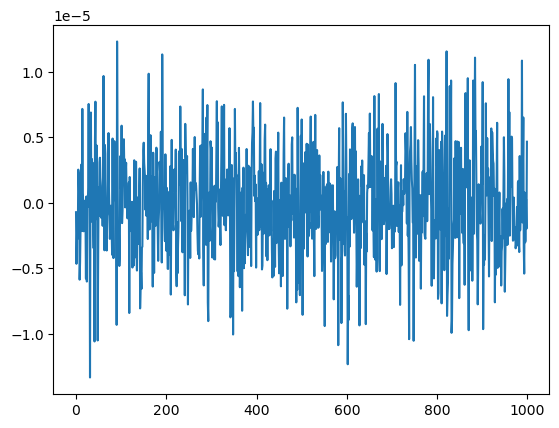

layer-0/bias:0, shape: (10,)
layer1/kernel:0, shape: (10, 10)


<Figure size 640x480 with 0 Axes>

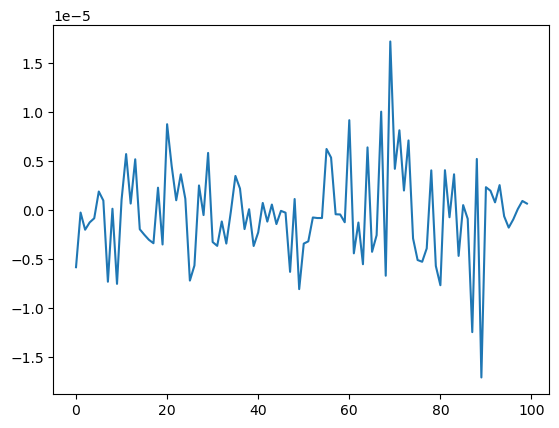

layer1/bias:0, shape: (10,)
layer2/kernel:0, shape: (10, 10)


<Figure size 640x480 with 0 Axes>

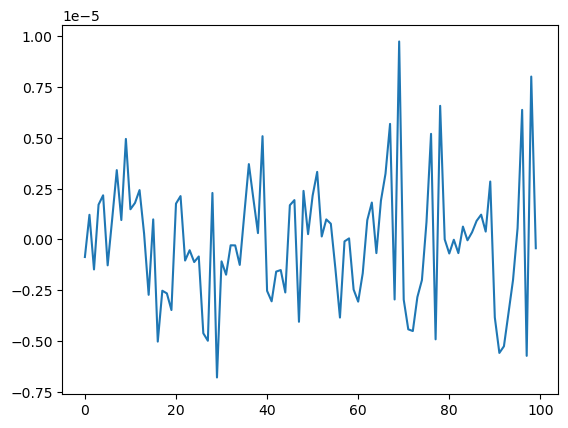

layer2/bias:0, shape: (10,)
layer3/kernel:0, shape: (10, 10)


<Figure size 640x480 with 0 Axes>

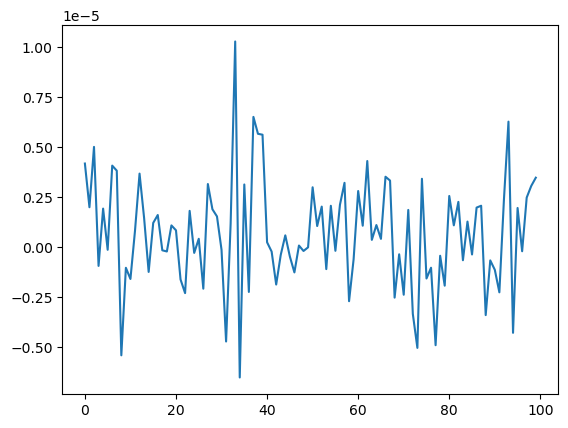

layer3/bias:0, shape: (10,)
layer4/kernel:0, shape: (10, 10)


<Figure size 640x480 with 0 Axes>

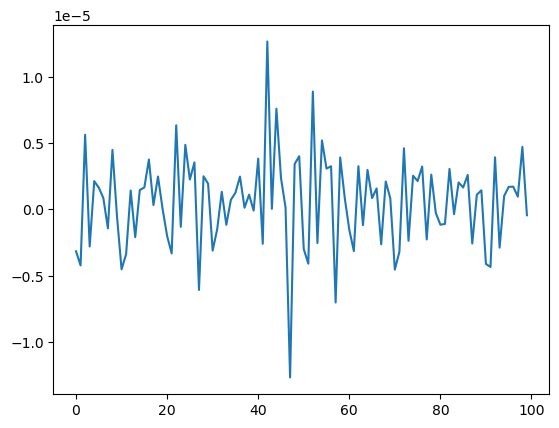

layer4/bias:0, shape: (10,)
layer5/kernel:0, shape: (10, 10)


<Figure size 640x480 with 0 Axes>

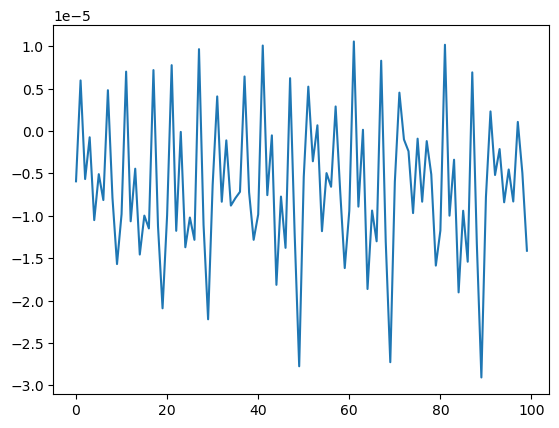

layer5/bias:0, shape: (10,)
layer6/kernel:0, shape: (10, 10)


<Figure size 640x480 with 0 Axes>

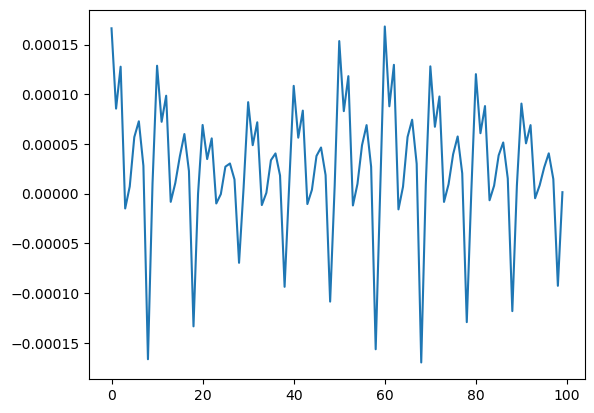

layer6/bias:0, shape: (10,)
layer7/kernel:0, shape: (10, 10)


<Figure size 640x480 with 0 Axes>

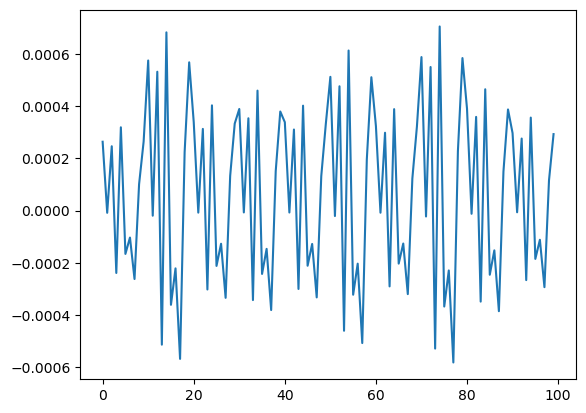

layer7/bias:0, shape: (10,)
layer8/kernel:0, shape: (10, 10)


<Figure size 640x480 with 0 Axes>

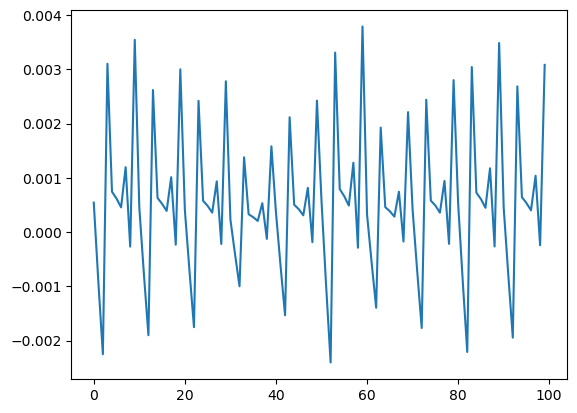

layer8/bias:0, shape: (10,)
layer9/kernel:0, shape: (10, 10)


<Figure size 640x480 with 0 Axes>

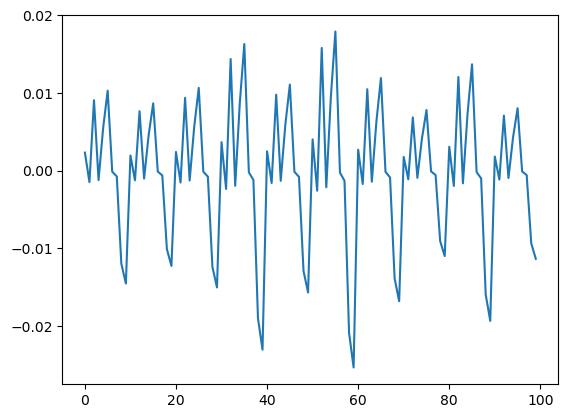

layer9/bias:0, shape: (10,)
layer10/kernel:0, shape: (10, 10)


<Figure size 640x480 with 0 Axes>

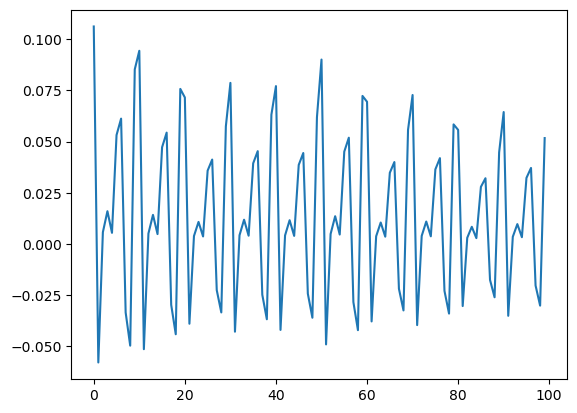

layer10/bias:0, shape: (10,)
layer11/kernel:0, shape: (10, 20)


<Figure size 640x480 with 0 Axes>

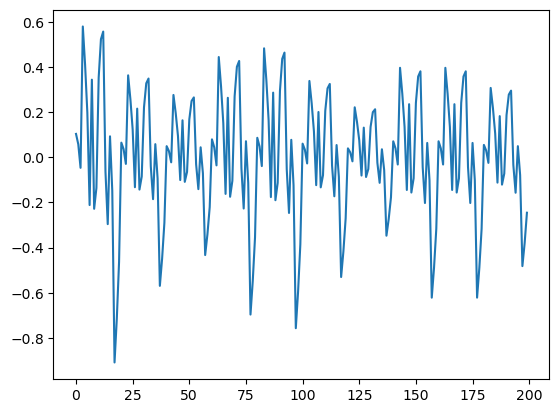

layer11/bias:0, shape: (20,)


<Figure size 640x480 with 0 Axes>

In [113]:
for var, g in zip(model.trainable_variables, grads):
    print(f'{var.name}, shape: {g.shape}')
    #print(g.numpy())
    plt.figure()
    if 'kernel' in var.name:
        #plt.imshow(g.numpy(), cmap='gray')
        plt.plot(g.numpy().flatten(), label=var.name)
        plt.show()

## Model is capable of learning very well with 1 layer so adding more layers does not improve the performance. 
## Each node has 10 nodes in the hidden layer. 

### Activation function:
    - Sigmoid: 
    - Vanishing gradients: how low is low for vanisging gradients??
    - Relu 
